# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [96]:
import pandas as pd
%run -i 'functions2.py'
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [153]:
df = pd.read_csv('zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df.shape

(14723, 272)

In [20]:
# I need to look through these regions and see what I can pull out
# There are 14723 individual zipcodes
# How many unique cities are there? Metros? Counties?
print('There are', len(set(df['City'])),'cities')
print('There are', len(set(df['Metro'])), 'metros')
print('There are', len(set(df['CountyName'])), 'counties')

There are 7554 cities
There are 702 metros
There are 1212 counties


In [154]:

df['City'][df.CountyName == 'District of Columbia'] = 'Washington DC'

functions2.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def clean_drop(data):


In [155]:
df['Metro'][df.CountyName == 'District of Columbia'] = 'Washington DC'

functions2.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def clean_drop(data):


In [156]:
df[df['CountyName'] == 'District of Columbia']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
29,66126,20002,Washington DC,DC,Washington DC,District of Columbia,30,94300.0,94000.0,93700.0,...,662800,668000,672200,673100,674600,678200,680900,683000,687500,691300
33,66133,20009,Washington DC,DC,Washington DC,District of Columbia,34,178800.0,179200.0,179600.0,...,1020000,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200
181,66135,20011,Washington DC,DC,Washington DC,District of Columbia,182,118900.0,118500.0,118200.0,...,582200,586200,591200,593200,591200,589500,590800,599100,611400,619100
246,66142,20019,Washington DC,DC,Washington DC,District of Columbia,247,91300.0,91000.0,90600.0,...,291100,296300,302500,306700,308800,310800,313400,314100,311800,308600
258,66125,20001,Washington DC,DC,Washington DC,District of Columbia,259,92000.0,92600.0,93200.0,...,765000,768800,771200,773300,777600,780500,781600,785500,791400,793300
402,66143,20020,Washington DC,DC,Washington DC,District of Columbia,403,104500.0,103800.0,103000.0,...,314700,317600,321800,324500,324800,324900,324900,327300,332800,337000
1263,66132,20008,Washington DC,DC,Washington DC,District of Columbia,1264,450100.0,448200.0,446300.0,...,1501600,1508800,1509700,1506000,1509100,1514300,1519400,1527900,1539600,1545900
1448,66127,20003,Washington DC,DC,Washington DC,District of Columbia,1449,130000.0,130100.0,130200.0,...,801000,807200,811900,813400,814600,814600,815300,817300,820200,820200
1707,66151,20032,Washington DC,DC,Washington DC,District of Columbia,1708,85700.0,85500.0,85400.0,...,288100,293400,297800,301500,303700,304000,304600,306800,308200,307400
2066,66139,20016,Washington DC,DC,Washington DC,District of Columbia,2067,362000.0,361200.0,360300.0,...,1202900,1198700,1196400,1190400,1184800,1183600,1186600,1190000,1196000,1199500


In order to better narrow down the dataset, I want to see if I can group together some of the regions on my list of top 20 tech cities. For example, there are many localities that fall into the NYC metro area. I will first accomplish this by plotting the top 20 tech cities on a map as a visual, and then use my data to combine localities in the respective metro areas.

In [45]:
import folium
us_map = folium.Map(location = [37.0902, -95.7129], tiles='Stamen Terrain')
us_map

In [46]:
def makeMarker(lats,longs,mapp):
    for lat,long in lats,longs:
        mark = folium.Marker((lat,long),color='blue')
        mark.add_to(mapp)

Save mapping for later.  
Need to come up with the metro areas for the top 20 list.
["Austin"
Raleigh
San Jose
Seattle
San Francisco
New York City
Charlotte
Dallas
Atlanta
Phoenix
Miami
Denver
Huntsville
Washington DC
Columbus
Boston
Baltimore
San Diego
Tampa
Chicago

In [128]:
cities = ['Austin', 'Raleigh','San Jose', 'Seattle','San Francisco','New York','Charlotte',
          'Dallas','Atlanta','Phoenix','Miami','Denver','Huntsville','Washington DC',
          'Columbus','Boston','Baltimore','San Diego','Tampa','Chicago']
# top_20 = df[df['City'].value.isin(cities)]

In [85]:
# In order to get Washington DC I needed to change the City value to Washington DC
df['City'][df.CountyName == 'District of Columbia'] = 'Washington DC'

functions2.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Provide data frame in parenthesis and this function will


In [130]:
# Now going to make a dataframe containing only those in this list
top_20 = df[df['City'].isin(cities)]

In [132]:
top_20.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


It is clear that there are duplicate names in the City column. That is, some states have cities with the same name. 

In [127]:
# I used this cell to look at each city in my list and view how many other states
# Have a city with the same name, and took note of it on paper
# Change the city name in the conditional to get the value
top_20[top_20['City'] == 'Chicago']['State'].value_counts()

IL    41
Name: State, dtype: int64

In [148]:
top_20

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13256,85109,61723,Atlanta,IL,Lincoln,Logan,13257,41500.0,41600.0,41700.0,...,84100,84400,85000,85700,86100,86800,87500,87600,86800,85900
13356,75522,40107,Boston,KY,Bardstown,Nelson,13357,36900.0,37300.0,37800.0,...,122500,124700,127000,129500,132700,135200,135800,138000,143700,148300
13465,63729,14782,Charlotte,NY,Jamestown,Chautauqua,13466,52900.0,52700.0,52600.0,...,78500,77200,76200,76400,77800,78000,76500,77000,79900,81600
13587,77917,46031,Atlanta,IN,Indianapolis,Hamilton,13588,113700.0,114800.0,115900.0,...,161300,160900,160200,160600,162300,165100,167700,167300,164800,162200


In [146]:
# Found that if the value_counts is less than 7, the city is not in the targeted state
top_20.sort_values(['City','State'])

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
227,71050,30331,Atlanta,GA,Atlanta,Fulton,228,97100.0,97700.0,98400.0,...,130300,131300,132700,134000,135100,137000,139400,140800,141500,141600
1097,71029,30309,Atlanta,GA,Atlanta,Fulton,1098,260400.0,261700.0,262900.0,...,780200,785900,797400,807600,813500,819200,824900,834500,850300,860700
1223,71043,30324,Atlanta,GA,Atlanta,Fulton,1224,189400.0,190800.0,192300.0,...,506500,509600,515100,519600,523900,528500,532600,537900,543700,545700
1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0,62300.0,62300.0,...,240900,244200,247900,251700,255300,258800,261600,264300,268700,272500
1787,71025,30305,Atlanta,GA,Atlanta,Fulton,1788,297200.0,299000.0,300900.0,...,860000,863400,868200,871200,872400,876800,885600,892900,897600,898200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,66140,20017,Washington DC,DC,Washington,District of Columbia,5340,121700.0,121400.0,121200.0,...,534300,534300,535300,535600,532600,531000,534400,542300,548400,548900
5453,66141,20018,Washington DC,DC,Washington,District of Columbia,5454,123000.0,122400.0,121800.0,...,533200,535200,534700,533100,534500,538700,542200,548300,553800,554100
5805,66155,20037,Washington DC,DC,Washington,District of Columbia,5806,277800.0,275800.0,273700.0,...,906400,914900,918700,923400,938900,953100,967600,990100,1013500,1019600
6484,66138,20015,Washington DC,DC,Washington,District of Columbia,6485,312400.0,311000.0,309800.0,...,1000500,1004000,1005300,1003700,1002900,1003600,1004400,1006400,1007200,1004000


In [150]:
top_20 = top_20.groupby('Metro').filter(lambda x: len(x)>6)

In [151]:
top_20

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,61804,10464,New York,NY,New York,Bronx,11038,195900.0,195600.0,195100.0,...,513100,518200,526100,532000,533100,533100,534400,533300,533000,536200
11359,96663,92121,San Diego,CA,San Diego,San Diego,11360,303400.0,303300.0,303100.0,...,937900,949000,958400,964800,969500,977700,990300,1001700,1012200,1019000
12041,58624,2110,Boston,MA,Boston,Suffolk,12042,135400.0,137500.0,139600.0,...,650200,652700,655800,666700,671700,691300,724900,746800,736800,724900
13120,76542,43137,Columbus,OH,Columbus,Franklin,13121,96200.0,96500.0,96800.0,...,165400,167200,167900,169100,171600,173700,175000,176100,177400,178500


In [152]:
top_20['Metro'].value_counts()

New York                 114
Chicago                   41
Austin                    39
Phoenix                   35
Columbus                  34
Dallas-Fort Worth         33
San Diego                 32
Denver                    27
San Jose                  27
Charlotte                 24
Seattle                   19
Washington                19
San Francisco             19
Boston                    18
Baltimore                 15
Raleigh                   15
Atlanta                   12
Huntsville                10
Miami-Fort Lauderdale      9
Tampa                      7
Name: Metro, dtype: int64

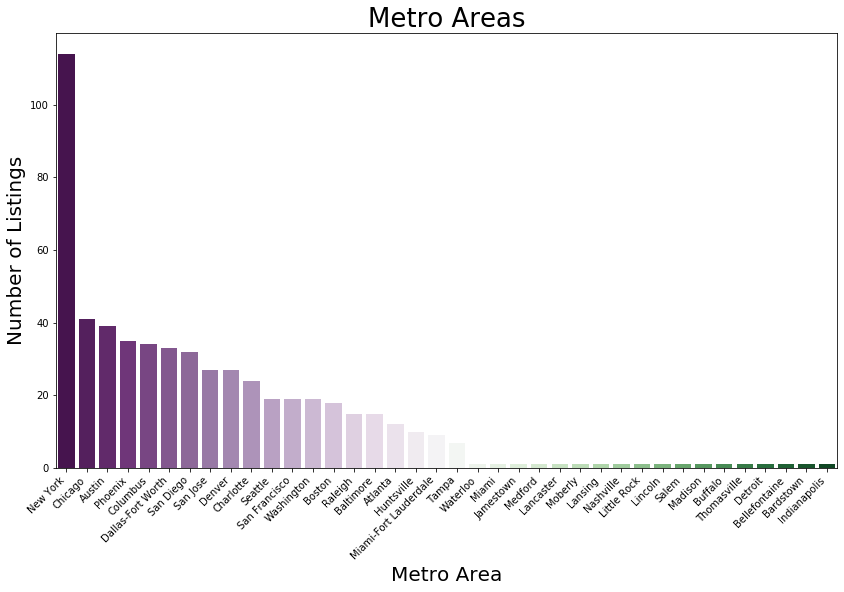

In [97]:
make_value_chart(top_20, 'Metro', 'Metro Area', 'Number of Listings', 'Metro Areas')

In [21]:
# Going to try out a function I found online that can combine 
# The datetime formula with the melting formula
def melt_data(df):
    ''' 
    Takes a dataframe with datetime data that is in wide format and melts it into long format; 
    Tranforms data into datetime object with time as index.
    User will need to change columns names on first line of code according to their own dataframe.
    '''
    
    melted = pd.melt(df, id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [22]:
# Going to make a copy of the original df to save my data in case of a mistake
df2 = df.copy()

In [27]:
cali = df[df['State']=='CA'].groupby('CountyName')['SizeRank']

In [34]:
cali.nunique()

CountyName
Alameda             43
Amador               8
Butte               12
Calaveras            8
Contra Costa        31
El Dorado           16
Fresno              40
Glenn                2
Humboldt            11
Imperial             5
Inyo                 3
Kern                27
Kings                4
Lake                 8
Lassen               2
Los Angeles        264
Madera               9
Marin               16
Mariposa             3
Mendocino            6
Merced              10
Modoc                1
Mono                 3
Monterey            16
Napa                 7
Nevada               8
Orange              83
Placer              22
Plumas               6
Riverside           60
Sacramento          46
San Benito           3
San Bernardino      56
San Diego           87
San Francisco       19
San Joaquin         25
San Luis Obispo     18
San Mateo           25
Santa Barbara       18
Santa Clara         52
Santa Cruz          12
Shasta               8
Siskiyou             8


In [35]:
nj = df[df['State']=='NJ'].groupby('CountyName')['SizeRank']

In [43]:
df[(df['State']=='NJ') & (df['Metro'] == 'New York')]['CountyName'].value_counts()

Bergen       65
Monmouth     47
Morris       43
Middlesex    34
Ocean        29
Union        26
Essex        25
Passaic      25
Somerset     21
Hunterdon    18
Sussex       15
Hudson       13
Name: CountyName, dtype: int64

# Step 2: Data Preprocessing

In [78]:
df.columns.values[1:]

array(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09',
       '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03',
       '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',
       '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03',
       '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',
       '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03',
       '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09',
       '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03',
       '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09',
       '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',
       '2002-04', '2002-05', '2002-06', '2002-07', 

In [82]:
# changed .values[1:] to .values[7:]
# did this as to not have to change the original df
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [83]:
times = get_datetimes(df)

In [84]:
times

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [85]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [62]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [68]:
melt_data(df.drop(columns=['RegionID', 'SizeRank'], axis=1))

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312
...,...
2017-12-01,281095.320247
2018-01-01,282657.060382
2018-02-01,284368.688447


# Step 5: ARIMA Modeling

# Step 6: Interpreting Results